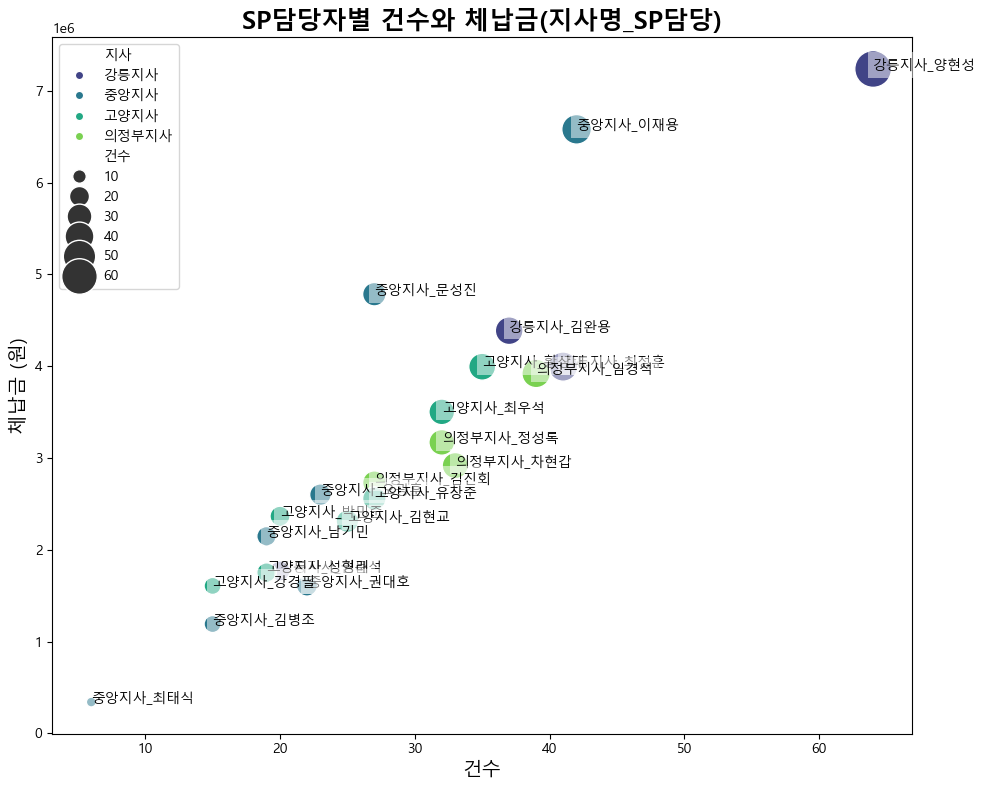

In [2]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 새로운 등록자별 SP담당 체납금 현황 데이터
data_sp = {
    '지사': ['강릉지사', '중앙지사', '중앙지사', '강릉지사', '강릉지사', '고양지사', '의정부지사', '고양지사',
            '의정부지사', '의정부지사', '의정부지사', '중앙지사', '고양지사', '고양지사', '고양지사', '중앙지사',
            '강릉지사', '고양지사', '중앙지사', '고양지사', '중앙지사', '중앙지사'],
    'SP담당': ['양현성', '이재용', '문성진', '김완용', '최정훈', '황상대', '임경석', '최우석',
              '정성록', '차현갑', '김진회', '오광훈', '유창준', '박민준', '김현교', '남기민',
              '권문석', '성형래', '권대호', '강경필', '김병조', '최태식'],
    '건수': [64, 42, 27, 37, 41, 35, 39, 32, 32, 33, 27, 23, 27, 20, 25, 19, 20, 19, 22, 15, 15, 6],
    '체납금': [7237093, 6579662, 4783682, 4386273, 3995028, 3993769, 3920556, 3501907, 3169584, 2916623,
            2731357, 2600135, 2557571, 2365313, 2310781, 2146885, 1768964, 1751748, 1609534, 1605834, 1190445, 340495]
}

# 데이터프레임 생성
sp_summary = pd.DataFrame(data_sp)

# 지사명과 SP담당을 합친 새로운 열 생성
sp_summary['지사_SP담당'] = sp_summary['지사'] + '_' + sp_summary['SP담당']

# 한글 폰트 설정 (Windows에서 사용할 경우)
plt.rc('font', family='Malgun Gothic')

# 시각화 2: 등록자별 건수와 체납금 상관관계 (지사명과 SP담당 표시)
sp_summary_sorted = sp_summary.sort_values(by='체납금', ascending=False)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='건수', y='체납금', hue='지사', size='건수', data=sp_summary_sorted, palette='viridis', sizes=(50, 700))

# 지사명과 SP담당 이름을 함께 표시
for i in range(sp_summary_sorted.shape[0]):
    plt.text(x=sp_summary_sorted['건수'][i], y=sp_summary_sorted['체납금'][i], s=sp_summary_sorted['지사_SP담당'][i],
             fontdict=dict(color='black', size=10),
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))

plt.title('SP담당자별 건수와 체납금(지사명_SP담당)', fontsize=18, weight='bold')
plt.xlabel('건수', fontsize=14)
plt.ylabel('체납금 (원)', fontsize=14)
plt.tight_layout()

# PNG 파일로 저장
plt.savefig('sp_summary_with_names.png')  # PNG 파일로 저장
plt.show()